In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [7]:
type(data)

dict

In [9]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982157e+07,1.982157e+07,False,NaN,1,None,None,None,2025-02-08T16:30:00.000Z,95985.890841,3.535765e+10,-35.5167,0.035624,-2.155887,-5.973375,2.114951,0.658110,20.319432,1.902591e+12,60.8811,2.015704e+12,None,2025-02-08T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:32:27.537386
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205333e+08,1.205333e+08,True,NaN,2,None,None,None,2025-02-08T16:30:00.000Z,2606.755841,2.386499e+10,-16.4924,-0.009838,-3.983893,-20.077336,-20.858944,-27.097338,-18.816262,3.142009e+11,10.0541,3.142009e+11,None,2025-02-08T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:32:27.537386
2,825,Tether USDt,USDT,tether,115852,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.416646e+11,1.435706e+11,True,NaN,3,None,None,None,2025-02-08T16:30:00.000Z,1.000028,7.845686e+10,-25.5766,-0.015419,-0.053887,0.013725,-0.020293,-0.066842,-0.052961,1.416685e+11,4.5333,1.435745e+11,None,2025-02-08T16:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-08 18:32:27.537386
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.776255e+10,9.998650e+10,False,NaN,4,None,None,None,2025-02-08T16:31:00.000Z,2.392741,5.749736e+09,-36.2641,-0.442159,-3.445647,-19.814699,3.695225,17.267980,296.925800,1.382108e+11,4.4217,2.392741e+11,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:32:27.537386
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.878265e+08,5.936677e+08,True,NaN,5,None,None,None,2025-02-08T16:31:00.000Z,194.708524,2.942180e+09,-37.8036,0.365955,-1.305279,-14.037884,1.797346,-6.801821,-7.528489,9.498397e+10,3.0388,1.155922e+11,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:32:27.537386
5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424801e+08,1.424801e+08,False,NaN,6,None,None,None,2025-02-08T16:31:00.000Z,605.320858,1.727843e+09,7.9995,1.588455,3.639108,-9.451961,-12.700975,-8.361046,-5.215111,8.624616e+10,2.7608,8.624616e+10,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:32:27.537386
6,3408,USDC,USDC,usd-coin,25550,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.607672e+10,5.607672e+10,False,NaN,7,None,None,None,2025-02-08T16:30:00.000Z,1.000042,6.662296e+09,-29.0213,-0.019474,-0.003409,-0.001991,-0.007881,-0.023818,0.017240,5.607907e+10,1.7941,5.607907e+10,None,2025-02-08T16:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-08 18:32:27.537386
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.479622e+11,1.479622e+11,True,NaN,8,None,None,None,2025-02-08T16:31:00.000Z,0.249723,1.335463e+09,-36.4219,0.037801,-1.760437,-22.525456,-24.404938,-34.155243,-2.586231,3.694955e+10,1.1824,3.694955e+10,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 18:32:27.537386
8,2010,Cardano,ADA,cardano,1458,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research

In [13]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])
    
    #if not os.path.isfile(r'C:\Users\zoroj\Desktop\Phyton\Scripts\API.csv'):
        #df.to_csv(r'C:\Users\zoroj\Desktop\Phyton\Scripts\API.csv', header = 'column_names')
    #else:
        #df.to_csv(r'C:\Users\zoroj\Desktop\Phyton\Scripts\API.csv', mode = 'a', header = False)

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


In [23]:
df72 = pd.read_csv(r'C:\Users\zoroj\Desktop\Phyton\Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.982153e+07,1.982153e+07,False,NaN,1,NaN,NaN,NaN,2025-02-08T14:26:00.000Z,96046.296239,4.659285e+10,-6.7977,-0.118972,-3.632244,-5.852018,3.989770,-1.961135,20.223533,1.903785e+12,60.7580,2.016972e+12,NaN,2025-02-08T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
1,1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205333e+08,1.205333e+08,True,NaN,2,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,2607.749038,2.793635e+10,-4.9106,-0.014809,-6.641440,-19.775591,-19.356002,-29.983506,-18.623029,3.143206e+11,10.0343,3.143206e+11,NaN,2025-02-08T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
2,2,825,Tether USDt,USDT,tether,115845,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.416646e+11,1.435706e+11,True,NaN,3,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,1.000025,9.134901e+10,-12.3305,0.007796,-0.045338,0.028716,0.048503,-0.031111,-0.080994,1.416682e+11,4.5226,1.435742e+11,NaN,2025-02-08T14:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-08 16:28:00.400882
3,3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.776255e+10,9.998650e+10,False,NaN,4,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,2.412827,7.033970e+09,-20.4738,0.233153,-4.175501,-19.062738,6.476605,10.417875,295.039648,1.393710e+11,4.4493,2.412827e+11,NaN,2025-02-08T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
4,4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.878289e+08,5.936682e+08,True,NaN,5,NaN,NaN,NaN,2025-02-08T14:26:00.000Z,194.473980,3.585247e+09,-23.0509,0.011256,-3.754575,-14.419617,4.001834,-10.460346,-6.979717,9.487003e+10,3.0277,1.154530e+11,NaN,2025-02-08T14:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
5,5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424801e+08,1.424801e+08,False,NaN,6,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,602.333855,1.637257e+09,-1.9867,2.488155,2.296053,-10.020981,-12.038988,-13.006673,-6.153165,8.582059e+10,2.7398,8.582059e+10,NaN,2025-02-08T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
6,6,3408,USDC,USDC,usd-coin,25548,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.612159e+10,5.612159e+10,False,NaN,7,NaN,NaN,NaN,2025-02-08T14:26:00.000Z,0.999973,7.963274e+09,-9.5247,-0.003496,-0.020460,-0.003884,-0.004873,-0.014235,-0.012951,5.612007e+10,1.7910,5.612007e+10,NaN,2025-02-08T14:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-08 16:28:00.400882
7,7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.479610e+11,1.479610e+11,True,NaN,8,NaN,NaN,NaN,2025-02-08T14:27:00.000Z,0.249353,1.594227e+09,-26.9239,0.368978,-4.240311,-22.815129,-22.486266,-38.506685,0.525478,3.689457e+10,1.1775,3.689457e+10,NaN,2025-02-08T14:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-08 16:28:00.400882
8,8,2010,Cardano,ADA,cardano,1458,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'rese

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982157e+07,1.982157e+07,False,NaN,1,None,None,None,2025-02-08T16:30:00.000Z,95985.890841,3.535765e+10,-35.5167,0.035624,-2.155887,-5.973375,2.114951,0.658110,20.319432,1.902591e+12,60.8811,2.015704e+12,None,2025-02-08T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205333e+08,1.205333e+08,True,NaN,2,None,None,None,2025-02-08T16:30:00.000Z,2606.755841,2.386499e+10,-16.4924,-0.009838,-3.983893,-20.077336,-20.858944,-27.097338,-18.816262,3.142009e+11,10.0541,3.142009e+11,None,2025-02-08T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,115852,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.416646e+11,1.435706e+11,True,NaN,3,None,None,None,2025-02-08T16:30:00.000Z,1.000028,7.845686e+10,-25.5766,-0.015419,-0.053887,0.013725,-0.020293,-0.066842,-0.052961,1.416685e+11,4.5333,1.435745e+11,None,2025-02-08T16:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.776255e+10,9.998650e+10,False,NaN,4,None,None,None,2025-02-08T16:31:00.000Z,2.392741,5.749736e+09,-36.2641,-0.442159,-3.445647,-19.814699,3.695225,17.267980,296.925800,1.382108e+11,4.4217,2.392741e+11,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.878265e+08,5.936677e+08,True,NaN,5,None,None,None,2025-02-08T16:31:00.000Z,194.708524,2.942180e+09,-37.8036,0.365955,-1.305279,-14.037884,1.797346,-6.801821,-7.528489,9.498397e+10,3.0388,1.155922e+11,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN
5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424801e+08,1.424801e+08,False,NaN,6,None,None,None,2025-02-08T16:31:00.000Z,605.320858,1.727843e+09,7.9995,1.588455,3.639108,-9.451961,-12.700975,-8.361046,-5.215111,8.624616e+10,2.7608,8.624616e+10,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,25550,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.607672e+10,5.607672e+10,False,NaN,7,None,None,None,2025-02-08T16:30:00.000Z,1.000042,6.662296e+09,-29.0213,-0.019474,-0.003409,-0.001991,-0.007881,-0.023818,0.017240,5.607907e+10,1.7941,5.607907e+10,None,2025-02-08T16:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.479622e+11,1.479622e+11,True,NaN,8,None,None,None,2025-02-08T16:31:00.000Z,0.249723,1.335463e+09,-36.4219,0.037801,-1.760437,-22.525456,-24.404938,-34.155243,-2.586231,3.694955e+10,1.1824,3.694955e+10,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1458,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.519350e+10,4.499505e+10,False,NaN,9,None,None,None,2025-02-08T16:30:00.000Z,0.687423,6.974562e+08,-26.1615,-0.986139,-6.176177,-26.034998,-25.543117,-27.776617,12.645167,2.419282e+10,0.7741,

In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [29]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11928,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19821568.00000,19821568.00000,False,NaN,1,None,None,None,2025-02-08T16:30:00.000Z,95985.89084,35357649328.60439,-35.51670,0.03562,-2.15589,-5.97337,2.11495,0.65811,20.31943,1902590862344.43384,60.88110,2015703707659.90991,None,2025-02-08T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9919,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120533298.03714,120533298.03714,True,NaN,2,None,None,None,2025-02-08T16:30:00.000Z,2606.75584,23864992426.94989,-16.49240,-0.00984,-3.98389,-20.07734,-20.85894,-27.09734,-18.81626,314200878727.05493,10.05410,314200878727.04999,None,2025-02-08T16:30:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,115852,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,141664621553.59421,143570570332.03564,True,NaN,3,None,None,None,2025-02-08T16:30:00.000Z,1.00003,78456855278.55318,-25.57660,-0.01542,-0.05389,0.01372,-0.02029,-0.06684,-0.05296,141668541649.11191,4.53330,143574543168.32001,None,2025-02-08T16:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,52,XRP,XRP,xrp,1525,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57762545657.00000,99986504676.00000,False,NaN,4,None,None,None,2025-02-08T16:31:00.000Z,2.39274,5749736106.68697,-36.26410,-0.44216,-3.44565,-19.81470,3.69523,17.26798,296.92580,138210789414.99042,4.42170,239274062185.04001,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,837,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,487826482.43994,593667675.17614,True,NaN,5,None,None,None,2025-02-08T16:31:00.000Z,194.70852,2942180483.63048,-37.80360,0.36596,-1.30528,-14.03788,1.79735,-6.80182,-7.52849,94983974348.01265,3.03880,115592156760.61000,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN
5,1839,BNB,BNB,bnb,2350,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480080.54000,142480080.54000,False,NaN,6,None,None,None,2025-02-08T16:31:00.000Z,605.32086,1727843406.04516,7.99950,1.58846,3.63911,-9.45196,-12.70098,-8.36105,-5.21511,86246164644.71425,2.76080,86246164644.71001,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,25550,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56076723964.31970,56076723964.31970,False,NaN,7,None,None,None,2025-02-08T16:30:00.000Z,1.00004,6662296393.89326,-29.02130,-0.01947,-0.00341,-0.00199,-0.00788,-0.02382,0.01724,56079069997.23264,1.79410,56079069997.23000,None,2025-02-08T16:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,74,Dogecoin,DOGE,dogecoin,1161,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147962156383.70523,147962156383.70523,True,NaN,8,None,None,None,2025-02-08T16:31:00.000Z,0.24972,1335463272.02409,-36.42190,0.03780,-1.76044,-22.52546,-24.40494,-34.15524,-2.58623,36949546025.99405,1.18240,36949546025.99000,None,2025-02-08T16:31:00.000Z,NaN,NaN,NaN,NaN,NaN
8,2010,Cardano,ADA,cardano,1458,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35193500774.44231,4

In [31]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03562,-2.15589,-5.97337,2.11495,0.65811,20.31943
Ethereum,-0.00984,-3.98389,-20.07734,-20.85894,-27.09734,-18.81626
Tether USDt,-0.01542,-0.05389,0.01372,-0.02029,-0.06684,-0.05296
XRP,-0.44216,-3.44565,-19.81470,3.69523,17.26798,296.92580
Solana,0.36596,-1.30528,-14.03788,1.79735,-6.80182,-7.52849
BNB,1.58846,3.63911,-9.45196,-12.70098,-8.36105,-5.21511
USDC,-0.01947,-0.00341,-0.00199,-0.00788,-0.02382,0.01724
Dogecoin,0.03780,-1.76044,-22.52546,-24.40494,-34.15524,-2.58623
Cardano,-0.98614,-6.17618,-26.03500,-25.54312,-27.77662,12.64517


In [33]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.03562
             quote.USD.percent_change_24h    -2.15589
             quote.USD.percent_change_7d     -5.97337
             quote.USD.percent_change_30d     2.11495
             quote.USD.percent_change_60d     0.65811
             quote.USD.percent_change_90d    20.31943
Ethereum     quote.USD.percent_change_1h     -0.00984
             quote.USD.percent_change_24h    -3.98389
             quote.USD.percent_change_7d    -20.07734
             quote.USD.percent_change_30d   -20.85894
             quote.USD.percent_change_60d   -27.09734
             quote.USD.percent_change_90d   -18.81626
Tether USDt  quote.USD.percent_change_1h     -0.01542
             quote.USD.percent_change_24h    -0.05389
             quote.USD.percent_change_7d      0.01372
             quote.USD.percent_change_30d    -0.02029
             quote.USD.percent_change_60d    -0.06684
             quote.USD.percent_change_90

In [35]:
type(df4)

pandas.core.series.Series

In [37]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.03562
            quote.USD.percent_change_24h  -2.15589
            quote.USD.percent_change_7d   -5.97337
            quote.USD.percent_change_30d   2.11495
            quote.USD.percent_change_60d   0.65811
            quote.USD.percent_change_90d  20.31943
Ethereum    quote.USD.percent_change_1h   -0.00984
            quote.USD.percent_change_24h  -3.98389
            quote.USD.percent_change_7d  -20.07734
            quote.USD.percent_change_30d -20.85894
            quote.USD.percent_change_60d -27.09734
            quote.USD.percent_change_90d -18.81626
Tether USDt quote.USD.percent_change_1h   -0.01542
            quote.USD.percent_change_24h  -0.05389
            quote.USD.percent_change_7d    0.01372
            quote.USD.percent_change_30d  -0.02029
            quote.USD.percent_change_60d  -0.06684
            quote.USD.percent_change_90d  -0.05296
XRP         quote.USD.percent_change_1h   -0.44216
            quote.USD.percent_change_24h  -3.44565
            quote.USD.percent_change_7d  -19.81470
            quote.USD.percent_change_30d   3.69523
            quote.USD.percent_change_60d  17.26798
            quote.USD.percent_change_90d 296.92580
Solana      quote.USD.percent_change_1h    0.36596
            quote.USD.percent_change_24h  -1.30528
            quote.USD.percent_change_7d  -14.03788
            quote.USD.percent_change_30d   1.79735
            quote.USD.percent_change_60d  -6.80182
            quote.USD.percent_change_90d  -7.52849
BNB         quote.USD.percent_change_1h    1.58846
            quote.USD.percent_change_24h   3.63911
            quote.USD.percent_change_7d   -9.45196
            quote.USD.percent_change_30d -12.70098
            quote.USD.percent_change_60d  -8.36105
            quote.USD.percent_change_90d  -5.21511
USDC        quote.USD.percent_change_1h   -0.01947
            quote.USD.percent_change_24h  -0.00341
            quote.USD.percent_change_7d   -0.00199
            quote.USD.percent_change_30d  -0.00788
            quote.USD.percent_change_60d  -0.02382
            quote.USD.percent_change_90d   0.01724
Dogecoin    quote.USD.percent_change_1h    0.03780
            quote.USD.percent_change_24h  -1.76044
            quote.USD.percent_change_7d  -22.52546
            quote.USD.percent_change_30d -24.40494
            quote.USD.percent_change_60d -34.15524
            quote.USD.percent_change_90d  -2.58623
Cardano     quote.USD.percent_change_1h   -0.98614
            quote.USD.percent_change_24h  -6.17618
            quote.USD.percent_change_7d  -26.03500
            quote.USD.percent_change_30d -25.54312
            quote.USD.percent_change_60d -27.77662
            quote.USD.percent_change_90d  12.64517
TRON        quote.USD.percent_change_1h    0.03307
            quote.USD.percent_change_24h  -1.02744
            quote.USD.percent_change_7d   -9.11677
            quote.USD.percent_change_30d  -5.72405
            quote.USD.percent_change_60d -11.21908
            quote.USD.percent_change_90d  38.78295
Chainlink   quote.USD.percent_change_1h   -0.17593
            quote.USD.percent_change_24h  -5.84123
            quote.USD.percent_change_7d  -26.47929
            quote.USD.percent_change_30d  -9.78947
            quote.USD.percent_change_60d -15.32149
            quote.USD.percent_change_90d  23.28912
Avalanche   quote.USD.percent_change_1h   -0.50606
            quote.USD.percent_change_24h  -4.87022
            quote.USD.percent_change_7d  -28.19357
            quote.USD.percent_change_30d -34.52834
            quote.USD.percent_change_60d -43.14941
            quote.USD.percent_change_90d -25.15688
Stellar     quote.USD.percent_change_1h   -0.51244
            quote.USD.percent_change_24h  -4.43092
            quote.USD.percent_change_7d  -19.99069
            quote.USD.percent_change_30d -20.11244
            quote.USD.percent_change_60d -13.77782
            quo

In [39]:
df5.count()

values    90
dtype: int64

In [41]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index().set_index(index)
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03562
1,Bitcoin,quote.USD.percent_change_24h,-2.15589
2,Bitcoin,quote.USD.percent_change_7d,-5.97337
3,Bitcoin,quote.USD.percent_change_30d,2.11495
4,Bitcoin,quote.USD.percent_change_60d,0.65811
5,Bitcoin,quote.USD.percent_change_90d,20.31943
6,Ethereum,quote.USD.percent_change_1h,-0.00984
7,Ethereum,quote.USD.percent_change_24h,-3.98389
8,Ethereum,quote.USD.percent_change_7d,-20.07734
9,Ethereum,quote.USD.percent_change_30d,-20.85894


In [43]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03562
1,Bitcoin,quote.USD.percent_change_24h,-2.15589
2,Bitcoin,quote.USD.percent_change_7d,-5.97337
3,Bitcoin,quote.USD.percent_change_30d,2.11495
4,Bitcoin,quote.USD.percent_change_60d,0.65811
5,Bitcoin,quote.USD.percent_change_90d,20.31943
6,Ethereum,quote.USD.percent_change_1h,-0.00984
7,Ethereum,quote.USD.percent_change_24h,-3.98389
8,Ethereum,quote.USD.percent_change_7d,-20.07734
9,Ethereum,quote.USD.percent_change_30d,-20.85894


In [45]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03562
1,Bitcoin,24h,-2.15589
2,Bitcoin,7d,-5.97337
3,Bitcoin,30d,2.11495
4,Bitcoin,60d,0.65811
5,Bitcoin,90d,20.31943
6,Ethereum,quote.USD.percent_change_1h,-0.00984
7,Ethereum,24h,-3.98389
8,Ethereum,7d,-20.07734
9,Ethereum,30d,-20.85894


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

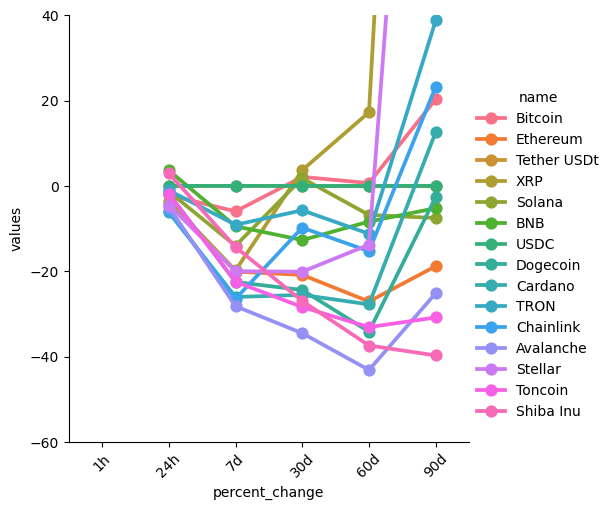

In [49]:
df7['percent_change'] = pd.Categorical(df7['percent_change'], 
                                       categories=['1h', '24h', '7d', '30d', '60d', '90d'], 
                                       ordered=True)

# Create the plot
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

# Set y-axis limits
plt.ylim(-60, 40)  # Adjust based on your data range

# Improve readability
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()